In [183]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2 as opcv
import os

increasing = "The graph is increasing"
decreasing = "The graph is decreasing"

In [94]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\ImageForOpenCV\Graphs',
    labels= 'inferred',
    label_mode= 'int',
    image_size= (210,330),
    class_names= ['0', '1'],
    color_mode ='grayscale',
    shuffle=True,
    subset= 'training',
    validation_split=0.2,
    seed = 123
)

ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\ImageForOpenCV\Graphs',
    labels= 'inferred',
    label_mode= 'int',
    image_size=(210, 330),
    class_names= ['0', '1'],
    color_mode ='grayscale',
    shuffle=True,
    subset= 'validation',
    validation_split= 0.2,
    seed = 123
)

Found 3639 files belonging to 2 classes.
Using 2912 files for training.
Found 3639 files belonging to 2 classes.
Using 727 files for validation.


In [119]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation= tf.nn.relu),
    keras.layers.Dense(128, activation= tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model_temp = model.fit(ds_train, epochs = 6)

Epoch 1/10
91/91 [==============================] - 5s 49ms/step - loss: 1456.0398 - accuracy: 0.5079

In [120]:
model.evaluate(ds_validation)

23/23 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

The graph is increasing


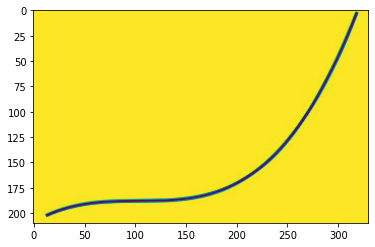

In [203]:
dir = DATADIR = "D:/ImageForOpenCV/g2.jpg"
img = opcv.imread(DATADIR, 0)
plt.imshow(img)
img = img.reshape(1, 210 * 330)
# img = img / 255

prediction = np.argmax(model.predict(img))
print(increasing) if prediction == 0 else print(decreasing)

In [201]:
def predict_function():
    x = np.arange(-0.8,1.4,0.05)
    y = np.sin(x)

    plt.plot(x, y, linewidth = 3)
    DIR = str("D:\ImageForOpenCV/g.jpg")
    plt.savefig(DIR)

    img = opcv.imread(DIR, 0)
    img = img[40:250, 55:385]
    opcv.imwrite(DIR, img)
    plt.imshow(img)

    img = img.reshape(1, 210 * 330)
    prediction = np.argmax(model.predict(img))
    print(increasing) if prediction == 0 else print(decreasing)

The graph is increasing


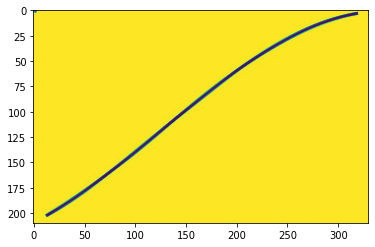

In [202]:
predict_function()